In [1]:
# for MAC
#import ssl
#ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.fashion_mnist import load_data
# ((訓練用圖片, 訓練答案), (驗證圖片, 驗證答案))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 3s 1us/step


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


是什麼？ 6


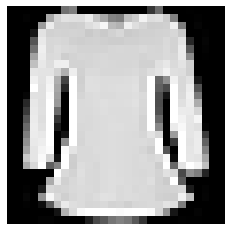

In [4]:
import random
import matplotlib.pyplot as plt
%matplotlib inline
c = random.randint(0, x_train.shape[0]-1)
plt.axis("off")
print("是什麼？", y_train[c])
plt.imshow(x_train[c], cmap="gray")

In [5]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,112,126,0,...,54,105,0,0,0,1,0,0,0,0
1,0,0,3,0,0,168,211,225,223,222,...,221,224,204,131,0,0,2,0,0,0
2,0,0,0,0,155,236,207,208,206,208,...,205,206,208,240,125,0,5,0,0,0
3,0,0,0,22,226,209,211,210,211,210,...,208,210,211,215,201,0,0,2,0,0
4,0,0,0,85,233,215,216,214,208,206,...,210,211,217,211,227,39,0,5,0,0
5,0,0,0,114,239,215,221,217,215,212,...,214,213,218,212,235,90,0,3,0,0
6,0,0,0,161,236,218,220,206,212,214,...,214,214,218,215,234,141,0,1,0,0
7,0,0,0,192,232,221,238,239,212,212,...,209,224,231,218,227,208,0,0,0,0
8,0,0,0,229,228,228,212,176,238,209,...,221,227,241,223,221,207,0,0,0,0
9,0,0,0,240,226,241,175,68,255,207,...,255,104,143,241,216,225,24,0,0,0


In [6]:
# 圖片處理:1.攤開:reshape 2.為了符合keras預期輸入：0-255 -> 0-1
x_train_reshape = x_train.reshape(60000, 784) / 255
x_test_reshape = x_test.reshape(10000, 784) / 255
#x_train_reshape[c]

In [7]:
# 答案處理:多個機率(One-Hot Encoding)
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("原本:", y_train[0])
print("轉化:", y_train_cat[0])

原本: 9
轉化: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [16]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 第一層要特別注意, input_dim
# 784 * 256 + 256(bias)
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [17]:
# 確定模型訓練方式
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [18]:
# batch:看多少筆資料做一次梯度下降(修正參數)
# epoch:整份資料要看幾次,決定我ˇ們何時要停止模型的訓練
# epoch 10, batch 200: 60000 * 10 / 200 = 3000次梯度下降
# 停止模型訓練: 欠擬合 -> 完美擬合 -> 過擬合 (沒有看過的資料)
# verbose: 印log幅度 1:進度條 0:完全不印 2:只印必要的
# 什麼時候停下: val_loss平滑停下
mlp.fit(x_train_reshape,
        y_train_cat,
        batch_size=200,
        epochs=20,
        validation_split=0.1,
        verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
 - 1s - loss: 0.5618 - acc: 0.8090 - val_loss: 0.4345 - val_acc: 0.8497
Epoch 2/20
 - 1s - loss: 0.4084 - acc: 0.8578 - val_loss: 0.4183 - val_acc: 0.8485
Epoch 3/20
 - 1s - loss: 0.3646 - acc: 0.8712 - val_loss: 0.3670 - val_acc: 0.8707
Epoch 4/20
 - 1s - loss: 0.3402 - acc: 0.8783 - val_loss: 0.3623 - val_acc: 0.8677
Epoch 5/20
 - 1s - loss: 0.3167 - acc: 0.8858 - val_loss: 0.3363 - val_acc: 0.8760
Epoch 6/20
 - 1s - loss: 0.3053 - acc: 0.8887 - val_loss: 0.3276 - val_acc: 0.8790
Epoch 7/20
 - 1s - loss: 0.2851 - acc: 0.8964 - val_loss: 0.3336 - val_acc: 0.8805
Epoch 8/20
 - 1s - loss: 0.2746 - acc: 0.9007 - val_loss: 0.3394 - val_acc: 0.8810
Epoch 9/20
 - 1s - loss: 0.2692 - acc: 0.9014 - val_loss: 0.3106 - val_acc: 0.8878
Epoch 10/20
 - 1s - loss: 0.2538 - acc: 0.9081 - val_loss: 0.3346 - val_acc: 0.8818
Epoch 11/20
 - 1s - loss: 0.2498 - acc: 0.9091 - val_loss: 0.3251 - val_acc: 0.8895
Epoch 12/20
 - 1s - loss: 0.2390 - a

In [19]:
mlp.evaluate(x_test_reshape, y_test_cat)

10000/10000 [==============================] - 0s 19us/step


[0.33526865841150283, 0.8854]